Data Understanding/Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime

In [2]:
df = pd.read_csv('bank_transactions.csv')

In [3]:
print(df.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation   
0            T1   C5841053     10/1/94          F   JAMSHEDPUR  \
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime   
0            17819.05          2/8/16           143207  \
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [4]:
print(df.describe())

       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06


In [5]:
print(df.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


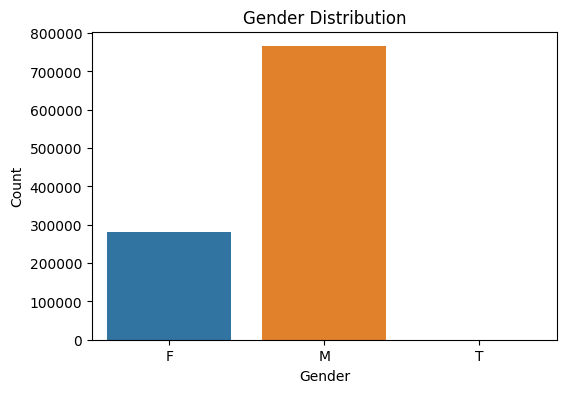

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

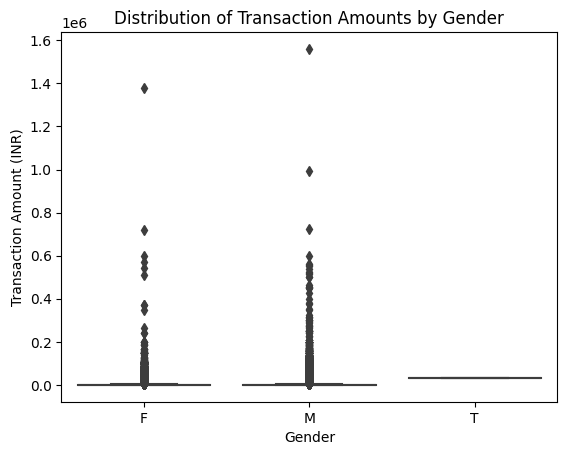

In [7]:
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title('Distribution of Transaction Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (INR)')
plt.show()

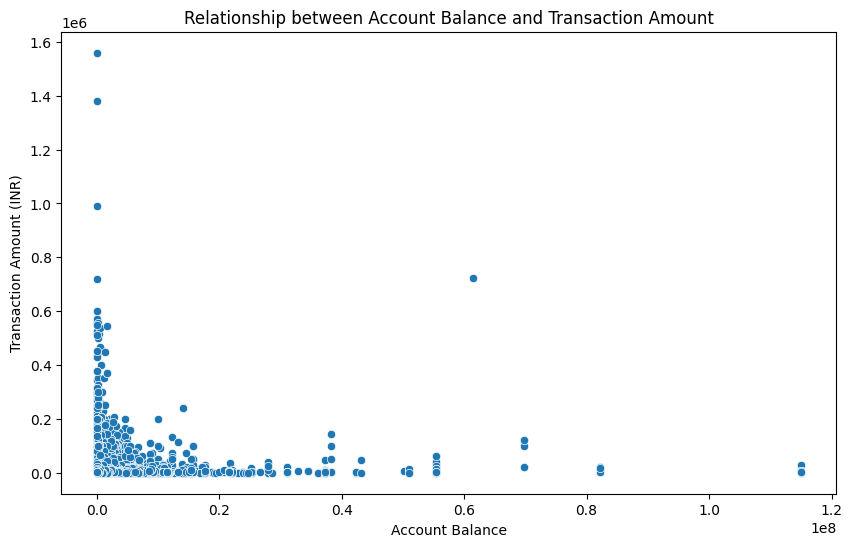

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df)
plt.title('Relationship between Account Balance and Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.show()

Preprocessing

In [9]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [10]:
df.dropna(inplace = True)

df.drop_duplicates(subset = ['CustomerID'] , keep = 'last',inplace = True)

# Convert transaction time to minute
df['TransactionTime'] = (df['TransactionTime'] / 60).astype('int64')\

df.drop(columns = 'TransactionID' , inplace = True , axis = 1)

df['CustGender'] = df['CustGender'].replace('T', 'F')

df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,2386,25.0
1,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,2364,27999.0
2,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,2378,459.0
4,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,3019,1762.5
5,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,2899,676.0
...,...,...,...,...,...,...,...,...
1048562,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,3080,799.0
1048563,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,3062,460.0
1048564,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,3055,770.0
1048565,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,3078,1000.0


In [11]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True, errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')

invalid_month_dob = df['CustomerDOB'].dt.month > 12
df.loc[invalid_month_dob, 'CustomerDOB'] = df.loc[invalid_month_dob, 'CustomerDOB'].apply(lambda x: x.replace(month=12))

invalid_month_transaction = df['TransactionDate'].dt.month > 12
df.loc[invalid_month_transaction, 'TransactionDate'] = df.loc[invalid_month_transaction, 'TransactionDate'].apply(lambda x: x.replace(month=12))

df.head()

C:\Users\adamn\AppData\Local\Temp\ipykernel_6744\2291534091.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True, errors='coerce')
C:\Users\adamn\AppData\Local\Temp\ipykernel_6744\2291534091.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,2386,25.0
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,2364,27999.0
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,2378,459.0
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,3019,1762.5
5,C1536588,2072-10-08,F,ITANAGAR,53609.20,2016-08-02,2899,676.0


In [12]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [13]:
median_age = df[df['Age'] > 0]['Age'].median()

df['Age'] = df['Age'].apply(lambda x: median_age if x < 0 or x > 50 else x)

In [14]:
df.to_csv('cleaned_data.csv', index=False)

Modeling (Clustering)

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('cleaned_data.csv')

sampled_df = df.sample(frac=0.1, random_state=42)

df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,2386,25.0,22.0
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,2364,27999.0,29.0
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,2378,459.0,20.0
3,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,3019,1762.5,28.0
4,C1536588,2072-10-08,F,ITANAGAR,53609.20,2016-08-02,2899,676.0,29.0


In [39]:
# Selecting numerical features for clustering
features = df[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

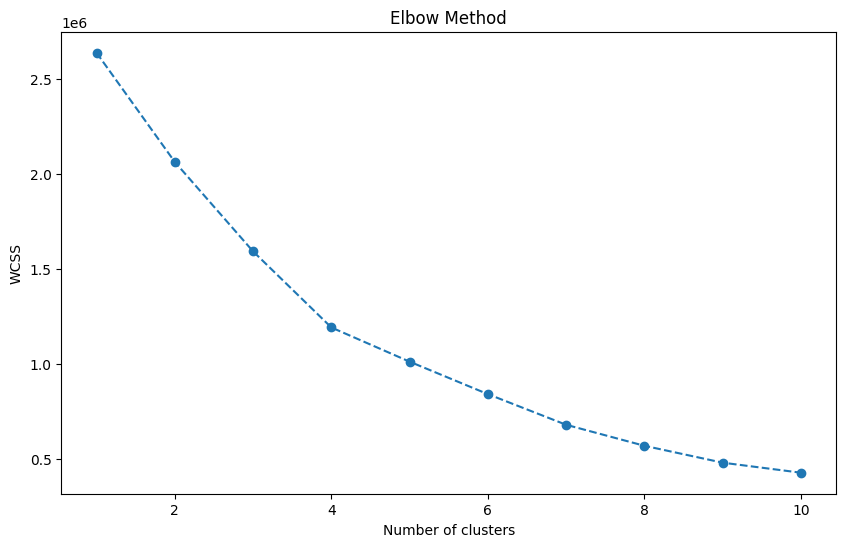

In [18]:
# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(scaled_features)


# Analyzing the clusters
df['Cluster'] = kmeans.labels_

print(df.head())

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance   
0   C5841053  1994-01-10          F   JAMSHEDPUR            17819.05  \
1   C2142763  2057-04-04          M      JHAJJAR             2270.69   
2   C4417068  1996-11-26          F       MUMBAI            17874.44   
3   C9031234  1988-03-24          F  NAVI MUMBAI             6714.43   
4   C1536588  2072-10-08          F     ITANAGAR            53609.20   

  TransactionDate  TransactionTime  TransactionAmount (INR)   Age  Cluster  
0      2016-08-02             2386                     25.0  22.0        0  
1      2016-08-02             2364                  27999.0  29.0        0  
2      2016-08-02             2378                    459.0  20.0        0  
3      2016-08-02             3019                   1762.5  28.0        0  
4      2016-08-02             2899                    676.0  29.0        0  


In [42]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)  